In [3]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import math
from classy import Class

In [6]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

CosmoComputationError: 

Error in Class: background_init(L:957) :error in background_solve(ppr,pba);
=>background_solve(L:1930) :error in background_initial_conditions(ppr,pba,pvecback,pvecback_integration);
=>background_initial_conditions(L:2485) :error in background_functions(pba, pvecback_integration, pba->normal_info, pvecback);
=>background_functions(L:549) :condition (rho_crit <= 0.) is true; rho_crit = nan instead of strictly positive

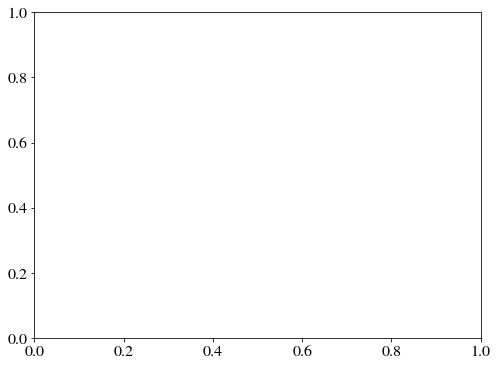

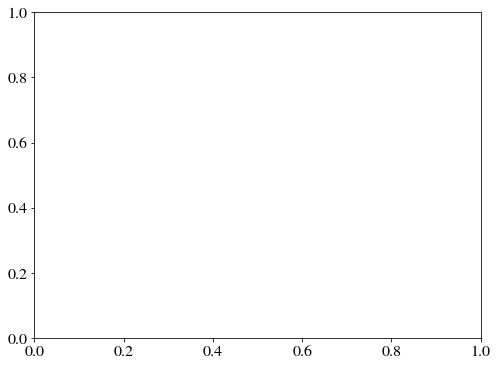

In [7]:
# Fixed settings
#
lcdm_settings = {"output":'tCl,lCl',
                   "lensing": 'yes',
                   "A_s": 2.187e-9,  
                   "n_s": 0.9696,
                   "h": 0.6837,
                   "omega_b": 0.02242,
                   "omega_cdm": 0.1175,
                   "tau_reio": 0.078,
                   'Omega_Lambda': 0.7,
                   "Omega_fld": 0,
                   "Omega_scf": 0.01,
                   "n_axion": 3,
                   "scf_tuning_index": 0,
                   "scf_parameters": 1.0e4,
                   "scf_potential": "axion",}

axi_settings = {"output":'tCl,lCl',
                   "lensing": 'yes',
                   "A_s": 2.187e-9,  
                   "n_s": 0.9696,
                   "h": 0.6837,
                   "omega_b": 0.02242,
                   "omega_cdm": 0.1175,
                   "tau_reio": 0.078,
                   #'Omega_Lambda': 0.7,
                   "Omega_fld": 0,
                   "Omega_scf": 0.01,
                   "n_axion": 3,
                   "scf_tuning_index": 0,
                   "scf_parameters": 1.0e4,
                   "scf_potential": "axion",
                   "log10_axion_ac": -3.3,
                   "log10_fraction_axion_ac": 0.1}
#
# arrays for output
#
#kvec = np.logspace(-4,np.log10(3),1000)
legarray = []
twopi = 2.*math.pi
#
# Create figures
#
fig_lcdmTT, ax_lcdmTT = plt.subplots()
fig_axiTT, ax_axiTT = plt.subplots()

#    
# call CLASS
#
M = Class()
M.set(lcdm_settings)
M.compute()

Cosmo = Class()
Cosmo.set(axi_settings)
Cosmo.compute()
#
# get Cls
#
clM = M.lensed_cl(2500)
ll = clM['ell'][2:]
clTT = clM['tt'][2:]

clCosmo = Cosmo.lensed_cl(2500)
axill = clCosmo['ell'][2:]
axiclTT = clCosmo['tt'][2:]
#
# plot C_l^TT
#
ax_lcdmTT.semilogx(ll,clTT*ll*(ll+1)/twopi,color='r',alpha=1,linestyle='-')
ax_axiTT.semilogx(axill, axiclTT*axill*(axill+1)/twopi, color ='b', alpha = 1, linestyle = '-')
#ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var2_color,alpha=var2_alpha,linestyle='-')
#
# reset CLASS
#
M.struct_cleanup()
    
# output of C_l^TT figure
#      
ax_lcdmTT.set_xlim([2,2500])
ax_lcdmTT.set_xlabel(r'$\ell$')
ax_lcdmTT.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
ax_lcdmTT.legend(legarray)
fig_lcdmTT.tight_layout()
#fig_TT.savefig('spectra_%s_cltt.pdf' % var_figname)